# Project: Web APIs & Classification
Completed by: Audrey Chan

## Executive Summary
In this project, Reddit's API and Natural Language Processing (NLP) are used to:
1. Collect posts from two subreddits
2. Pre-process text (tokenization, normalization, clean up) 
3. Train a classifer
4. Using the best model, predict which subreddit a new post belongs to!

### Subreddits
Here are the two subreddits that were compared. How do you think posts differ between each subreddit?
1. [r/NoPoo](https://www.reddit.com/r/nopoo)<br>
👨‍🦱 "No Shampoo" A place to discuss natural hair care and alternatives to shampoo.
2. [r/Constipation](https://www.reddit.com/r/constipation)<br>
🚫💩 A place for people with constipation issues, where all questions related with the condition can be debated.

Posts were collected from the subreddits by accessing Reddit's API. All that was required to access the API is by adding `.json` to the end of the subreddit page urls. 

### Pre-Processing
After scraping the posts, the posts were first pre-processed with the following techniques and packages.

| Technique   | Function/Module    |
|-------------|--------------------|
| Remove HTML | `BeautifulSoup` |
| Convert to lower case | Python string `lower()` |
| Tokenizing  | `nltk.tokenize.regexp` |
| Lemmatization | `nltk.stem.wordnet.WordNetLemmatizer` |
| Removing stop words | `stopwords` from `nltk.corpus` |
| Vectorizing | `sklearn.feature_extraction.text.TfidfVectorizer` |

### Training a Classifier
With the pre-processed subreddit texts, different classification models were tried to determine the best model.
- Logistic Regression
- Nearest Neighbors
- Naive Bayes
- Linear SVM
- Random Forest

The best model was found to be Random Forest with a score of: 100%!

### Predictions on New Text
With our best model, for fun, we can then make predictions based on new text that we make up below in `text_new`. These were inspired by titles of subreddits posts, which were not used to train our model. 

In [1]:
# new texts to be tested with our model
text_new = [
    'Coming up on my one year anniversary of a water only routine',
    'Prunes just made my life amazing',
    '6 months cold water only (1 baking soda reset) and still oily up until recently',
    'All Plugged Up. Help?',
    'Shikakai and Reetha are now my holy grail',
    'I go once a day but it\'s little balls, is that still constipation?',
    'How to stop breakage?',
    'Fiber makes it worse?',
    'Can\t get apple cider out',
    'Feels like there\s a large rock in my ass',
    'Cornstarch and powder foundation',
    'Jeezus - Milk of Magnesia - lost 5 pounds'
]

## Here's the Code:
In this notebook below, it consists of functions that were created to collect posts, pre-process text, train classifiers, and predict on test data. 

In [2]:
# import librairies
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

import collections

### Fetching Data from Reddit API
Functions were re-purposed from *9.05-LESSON-reddit* to retrieve 150 pages of data from both subreddits json. The following code is captured in a `reddit_scraping.py` file, which can be found within the same folder directory. The code scraped the posts and saved them in a `data.csv` file. 

### Cleaning and Pre-processing Text

In [3]:
# import data
df = pd.read_csv('data.csv', index_col = 0)

In [4]:
# take a look at the df
pd.set_option('display.max_colwidth', -1)
df.head()

,name,selftext,subreddit
0,t3_a66615,"Hi everyone!\n\nIt seems that our little community has been growing for a while, so I've took the liberty of providing our space a more appealing look. Hope you enjoy it.\n\nRegarding the new rules, you can check them [here](https://www.reddit.com/r/Constipation/about/rules/) or in the sidebar. They are pretty simple, but your opinions and questions are welcome.\n\nLastly, do not forget to always check a health professional if you have a serious condition.",Constipation
1,t3_bnhb70,"Hi! Hoping y'all may be able to help me. I'm 25/M and I've never had constipation issues before. I get anxiety semi-easily so I'm hoping one of you friendly folks can help me ease my worries. &lt;333\n\nBasically, I've only had small pebbles / small pencil-shaped BMs for around 8 or 9 days now. No sizable BMs. I was very dehydrated and eating horribly when this started (an anomaly for me) which almost certainly triggered it, so I've been drinking 3 liters of water and eating much much healthier every day since.\n\nI went to a GI doctor 4 days ago and he told me to take Miralax once daily and to supplement with Metamucil if I want, which I've been doing. It hasn't really helped as far as I can tell. I'm not in pain, just mild discomfort, but I'm a little worried and want to nip this in the bud. Today is day 8, and I took a full dose (30ml) of Milk of Magnesia this morning and it only resulted in a few small bursts of green powdery-looking diarrhea — which I sense may be the Metamucil fiber mixed with the green chlorophyll of all the vegetables I'm eating. Now I've just inserted a glycerin suppository 30 minutes ago but I'm not really feeling anything at all.\n\nI have a check-in with the GI doctor on Monday since he doesn't work weekends. Should I try and see an urgent care doctor before then? Is there something else I should try?",Constipation
2,t3_bnjy06,"I'm curious as to what I should do. I haven't been able to go for 2 days but when I go theres always a lot and I go to the bathroom daily. For me to go 1 day without I'd worrisome. Then, the discomfort set in. Now, I'm in bed and my leg is shaking trying to hold in the waste because it hurts much to bad to go. I know I need to drink more water and Im pretty sure the cause was what I had to eat. It hurts so bad and I've shamefully taken more pills than I should have. 2 different types of laxative and a stool softener. It still hurts too bad but for there to be as much as I suspect, I could use some form of immediate release. Any help is much appreciated and the sooner, the better.",Constipation
3,t3_bnbw5z,"This is such a random post but I haven't been able to find people to chat with who share similar issues, since my problems affect me daily. I was curious if anyone here would want to chat or make a new friend who has CIC or IBS-C. Thank you",Constipation
4,t3_bmq0o1,"About a week and a half ago I started feeling constipated, I would usually be able to go #2, but it would be very little stool and I still felt constipated. Last night I drank milk of magnesia thinking this and it worked. However the feeling of being back up is still there. Is it possible to still be constipated after taking a laxative that seems to have done it's job?",Constipation


In [5]:
df.tail()

,name,selftext,subreddit
6819,t3_7wtwio,"I quit washing my hair about 10 months ago. I did this because I heard it improves texture, waves, and overall quality and health.\n\nMy hair looks much better, I **don't think** it smells, it styles easier, isn't greasy but is a little dirty feeling. \n\nI haven't done anything to my hair but wash with water in the shower since I quit washing. I have very straight, very thick hair, and so I wanted a bit more natural waves and texture which is why I started no poo.\n\nIs there anything I need to be doing long term? I don't want to start using shampoo again because my hair looks and behaves better like this but am I missing any important care of hygiene protocols?",NoPoo
6820,t3_7wsf1z,"Hey you all!\nI have a situation: I'm 19 years old and have been going no poo for over two years now. The result is rather great, my hair has more volume, doesn't get greasy that quickly and I just love my curly hair.\nI started going no poo because of my ex, who read it online somewhere and I wanted to support her. \n\nNow the problem is that neither my family nor my friends get why I do it, as if they don't see an improvement. They call it filthy and dirty. And my older sister is the worst, every time she visits, she tells me to wash it properly with shampoo and that I have to stop being dirty. But I never know what to say to her, how to convince her that it is not dirty and good for my looks...\n\nWhat are your guys and girls arguments? Do your loved ones know and how do they react? How do I convince them? \n\nAs an aside note: people who don't know I'm doing it, compliment my hair almost weekly, some people even smell it, saying it smells great...\n\nTL;DR: I need arguments why I go no poo...",NoPoo
6821,t3_7wgpo6,"Hi everyone! New here and have a question after reading a bit here and there about WO.\n\nIt's been only a week since the last shampoo and my hairs are not that bad. A bit oily at the roots but nothing disgusting (I mostly keep my hairs in a bun with just a towel drying). The ends are dry but I want to see where it goes on a longer run. I saw that I'm suppose to use cold water to keep the sebum from going away and produce more and to close the pores. But, I just can't use cold water, even just for a minute. My brain won't allow it and I will probably be grumpy all day long. I know it is a caprice but you know, we all have some. So, will it just not work because of that or hot water is ok too? Thank you in advance!!!",NoPoo
6822,t3_7wavp8,NaN,NoPoo
6823,t3_7vzh7b,NaN,NoPoo


In [6]:
df.shape

(6824, 3)

In [7]:
df['subreddit'].value_counts()

NoPoo           3619
Constipation    3205
Name: subreddit, dtype: int64

By taking a sneak peak at the posts retrieved, we observed a few things that we'll have to clean.
- Some `NaN` values were found
- Some HTML were found
- We won't need the `name` column

#### Removing Blanks
We will first remove any `NaN` rows (in the column selftext) from the dataframe and see how many posts we are left with for each subreddit category. 

In [8]:
df = df.dropna()
df['subreddit'].value_counts() # total of 5708 posts

NoPoo           2995
Constipation    2713
Name: subreddit, dtype: int64

We are left with a total of 5708 posts (**2995** from */r/NoPoo* and **2713** from */r/Constipation*, which should be enough from each subreddit to train our models. 

#### Train, Test, Split
Before doing any further processing to our dataframe, let's train test split! 

In [9]:
x = df['selftext']
y = df['subreddit'].map({'Constipation':0, 'NoPoo':1})

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

#### Tokenizing, Lower Case, Lemmatizing, Stop Words, HTML
The function below `text_to_words()` will convert a raw post to a cleaned string of words. The input is a single string (a raw post), and the output is a string (a preprocessed post).
<br>
<br>
The function will convert a single string (a raw post) by:
- Removing any HTML (i.e. \n as can be seen from our preview of our df above)
- Converting to lower case
- Tokenizing the post into words, removing punctuation
- Lemmatizing
    - Lemmatizing is preferred over Stemming because stemming cuts off the end or the beginning of words. With this method, important parts of the words may sometimes be chopped off.
- Removing stop words

In [10]:
def text_to_words(selftext):
    # 1. Remove HTML
    text = BeautifulSoup(selftext).get_text()
    
    # 2. Convert to lower case
    lower_case = text.lower()
    
    # 3. Tokenize into words, removing punctuation and numbers
    retokenizer = RegexpTokenizer(r'[a-z]+')
    word_tokens = retokenizer.tokenize(lower_case)
    
    # Lemmatize
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer() 
    tokens_lem = [lemmatizer.lemmatize(i) for i in word_tokens]
    
    # 4. Remove stop words
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in tokens_lem if not w in stops]

    # 5. Join the words back into one string separated by space, and return the result.
    return(" ".join(meaningful_words))

The function below `pre_process()` will call the `text_to_words()` function to pre-process every post in the data set. 

In [11]:
# function to pre-process text: takes in an X dataset as input
# and returns back a list of pre-processed/cleaned text
def pre_process (X):

    # prints out number of posts
    num_text = X.size
    clean_text = []
    print(f'Number of posts: {num_text}\n')

    # calls text_to_words() function to pre-process every post in the data set
    print("Cleaning and parsing posts...")
    for i in range(0, num_text):
        # if the index is evenly divisible by 500, print a message
        if((i+1) % 500 == 0):
            print('Review %d of %d' % ( i+1, num_text))                                                                    
        clean_text.append(text_to_words(X.iloc[i]))
    return clean_text

In [12]:
# pre-processing train data
clean_train_text = pre_process(X_train)

Number of posts: 4566

Cleaning and parsing posts...
Review 500 of 4566
Review 1000 of 4566
Review 1500 of 4566
Review 2000 of 4566
Review 2500 of 4566
Review 3000 of 4566
Review 3500 of 4566
Review 4000 of 4566
Review 4500 of 4566


In [13]:
# pre-processing test data
clean_test_text = pre_process(X_test)

Number of posts: 1142

Cleaning and parsing posts...
Review 500 of 1142
Review 1000 of 1142


In [14]:
# taking a look at pre-processed posts
clean_train_text[0:3]

['going low poo couple month usually alternate water co wash lush shampoo conditioner wash hair week really curly hair tried bicarb acv work first couple time hair feel weird lush shampoo ok use poo ha anyone used poo pulled marketing scheme btw conditioner work really well hair',
 'rectum cannot take much poop cannot help involuntarily push',
 'title say dealing constipation issue since wa kid use take mineral oil changed eating fiber food peanut peanut butter veggie drinking water oatmeal along eating fiber gummies x b nowadays notice poop maybe day row poop whole another week tummy hurt said hurt sit stand walk bend etc x b go poop poop small size normal worried tummy hurting like constipated']

In [15]:
clean_test_text[0:3]

['stopped eating carbs wa major rice bread pasta oat milk eater cut eat plenty protein nut plant altered amount water drink constipation gone still poop irregularly least pain buttery soft blood new diet rock done',
 'hi everyone started nopoo last summer used shampoo month shower daily usually wash hair hot water degree celsius think remove oily buildup hair feel fine greasy think look better read post saying wash cold water experience think better year old male regular long anything hair',
 'like many member community kind stumbled upon nopoo one day reading decided give shot initially bought shampoo bar planned use greasy transition phase ended using couple time made hair feel exactly would use head shoulder used daily discovering sub probably guess wa using h ditched shampoo altogether wa hoping nopoo would solve dandruff issue year later thrilled texture life hair ironically one thing wa hoping would wa hoping could get input changing routine try curb issue thing may helped wa one

#### BONUS: Visualizing Word Count
We know that we had 2995 posts in total from */r/NoPoo* and 2713 from */r/Constipation*, which has been split up into train and test sets. That seems to be enough to train our model but here, we will visualize if we have sufficient words in each post.

In [16]:
# function will chart a histogram of word count for y_labels and clean_text (list of posts that we pre-processed above)
def word_count_chart(y_labels, clean_text, title):
    # merging posts and subreddit category label back together
    y = y_labels.map({0: 'Constipation', 1:'NoPoo'}).reset_index()

    df_word_count = pd.concat([pd.Series(clean_text), y], axis = 1)
    df_word_count.columns = ['post', 'index', 'subreddit']

    # creating column to store word count (for each post)
    df_word_count['word_count'] = df_word_count.apply(lambda row: len(row['post']), axis=1)
    
    return alt.Chart(df_word_count, title = title).mark_bar(opacity = 0.6).encode(
        x = 'word_count',
        y = 'count()',
        color = alt.Color('subreddit:O', 
                         scale = alt.Scale(scheme = 'set1')
                         )
    ).properties(
        width = 500, 
        height = 200
    )

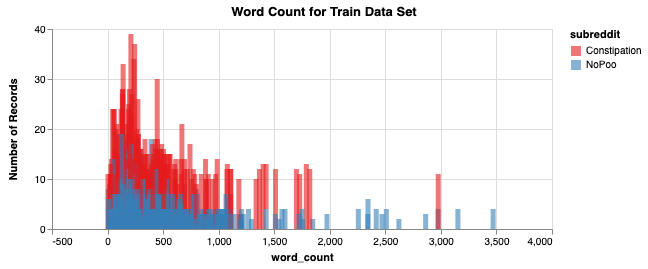

In [17]:
word_count_chart(y_train, clean_train_text, 'Word Count for Train Data Set')

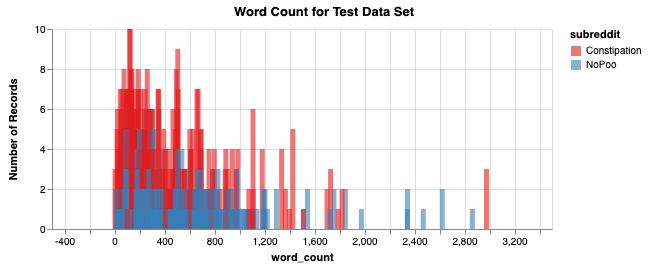

In [18]:
word_count_chart(y_test, clean_test_text, 'Word Count for Test Data Set')

In general, it looks like posts from both subreddits have similar distribution of word count per post. *Constipation* may look like it has greater number of posts in general although as we know from before, our dataset has about 300 more posts for *NoPoo* than *Constipation*. The word count distribution for *NoPoo* may be more uniform. 

#### Vectorizing
Regardless of the word count for each subreddit, we will be using `TfidfVectorizer()` which ease any concern about word count differences between both subreddits. `TfidfVectorizer()` was used over `CountVectorizer()` because `TfidfVectorizer()` weights down the common words occuring in almost all the documents and give more importance to the words that appear in a subset of documents. TF-IDF works by penalising these common words by assigning them lower weights while giving importance to some rare words in a particular document.

In [19]:
# initialize the tfidfvectorizer object
tvec = TfidfVectorizer()

# fits and transform the model and learn the vocab
X_train_counts = tvec.fit_transform(clean_train_text)

# transform test data based on learned vocab from training data
X_test_counts = tvec.transform(clean_test_text)

In [20]:
X_train_counts.shape

(4566, 5991)

Let's take a look at the top words that appear in our subreddits!

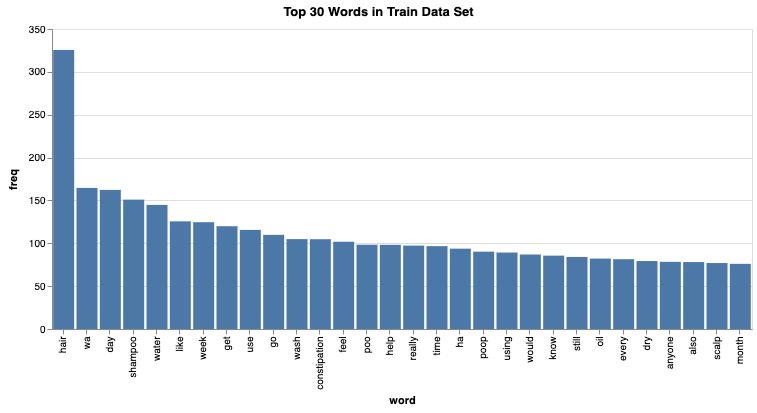

In [21]:
def get_top_n_words(data, n):
    sum_words = data.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

common_words = get_top_n_words(X_train_counts, 30)
df = pd.DataFrame(common_words)
df.columns = ['word', 'freq']

alt.Chart(df, title = 'Top 30 Words in Train Data Set').mark_bar().encode(
        x = alt.X('word', sort = None),
        y = 'freq'
    ).properties(
        width = 700, 
        height = 300
    )

### Classification Problem
Our data is finally ready to fit into our model 🙂.

In [22]:
# function to instantiate a model, fit on train data, and output score on train and test data
def model (model, model_name, X_train, y_train, X_test, y_test):
    # instantiate
    model = model
    # fit
    model.fit(X_train, y_train)
    # prints out score on train data
    print(f'{model_name} score on train: {model.score(X_train, y_train)}')
    # prints out score on test data
    print(f'{model_name} score on test: {model.score(X_test, y_test)}')
    # print out counter for predictions
    preds = model.predict(X_test)
    print(f'{collections.Counter(preds)}\n')

In [23]:
# loop to try out different classifcation models
classification_models = {LogisticRegression(solver = 'lbfgs') : 'Logistic Regression',
                        KNeighborsClassifier() : 'Nearest Neighbors',
                        MultinomialNB() : 'Naive Bayes',
                        svm.SVC(gamma = 'scale') : 'Linear SVM', 
                        RandomForestClassifier(n_estimators = 100) : 'Random Forest'}

for key, value in classification_models.items():
    model(key, value, X_train_counts, y_train, X_test_counts, y_test)

Logistic Regression score on train: 0.9991239597021463
Logistic Regression score on test: 0.9964973730297724
Counter({1: 585, 0: 557})

Nearest Neighbors score on train: 0.9982479194042926
Nearest Neighbors score on test: 0.9929947460595446
Counter({1: 581, 0: 561})

Naive Bayes score on train: 0.9971528690319754
Naive Bayes score on test: 0.9938704028021016
Counter({1: 582, 0: 560})

Linear SVM score on train: 0.9886114761279019
Linear SVM score on test: 0.9868651488616462
Counter({1: 574, 0: 568})

Random Forest score on train: 1.0
Random Forest score on test: 1.0
Counter({1: 589, 0: 553})



All classifiers performed very well! Since this is the case, we can basically choose any to model our data and predict on new text. This does better than a **naive model**, which may be to predict *NoPoo* or *Constipation* randomly, which would achieve a score of approximately 0.50. We don't need to do further work to improve our model.

### Finale: Predictions on New Text
Let's use the Random Forest model to make predictions on `text_new` and see how it does. 

In [24]:
# testing model out with new text
X_new_counts = tvec.transform(text_new)

model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train_counts, y_train)
preds = model.predict(X_new_counts)

texts = pd.Series(text_new)
preds = pd.Series(preds).map({0:'Constipation', 1:'NoPoo'})

result = pd.concat([texts, preds], axis = 1)

result

,0,1
0,Coming up on my one year anniversary of a water only routine,NoPoo
1,Prunes just made my life amazing,Constipation
2,6 months cold water only (1 baking soda reset) and still oily up until recently,NoPoo
3,All Plugged Up. Help?,Constipation
4,Shikakai and Reetha are now my holy grail,NoPoo
5,"I go once a day but it's little balls, is that still constipation?",Constipation
6,How to stop breakage?,NoPoo
7,Fiber makes it worse?,Constipation
8,Can\t get apple cider out,NoPoo
9,Feels like there\s a large rock in my ass,Constipation


How do you think we did?

## Conclusion
Using Natural Language Processing (NLP) to predict post classification between two subreddits, it was found that the best model was Random Forest with a score of: 100%! In this project, we explored tools such as web scrapping, tokenization, normalization while trying a few classifiers. 

Humans expresses themselves (verbally or written) everyday, with underlying tone and meaning based on their choice or structure of words and sentences. NLP is a powerful emerging technology so machine can interpret human speech.

A few examples of NLP that people use every day are:
- Spell check
- Autocomplete
- Voice text messaging
- Spam filters
- and many more...!